# Árboles de decisión, Random Forest (RF), Máquinas de Soporte Vectorial (SVM) y Redes Neuronales – Explicación de Predicciones

## Aprendizaje Automático

### UPS


- Mateo Barzallo
- Jorge Cueva
- Karen Quito

## Explicabilidad de la IA

In [9]:
### Librerias
import pandas as pd;
import numpy as np

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import ConvexHull, Delaunay

import itertools

from sklearn.preprocessing import StandardScaler
from scipy.spatial import ConvexHull
from shapely.geometry import Polygon


### Carga de datos

df = pd.read_csv("online_shoppers_intention.csv")

df["Revenue"] = df["Revenue"].astype(int)
df["Month"] = df["Month"].astype("category").cat.codes
df["VisitorType"] = df["VisitorType"].astype("category").cat.codes
df["Weekend"] = df["Weekend"].astype(int)

features = [
    "Administrative","Administrative_Duration",
    "Informational","Informational_Duration",
    "ProductRelated","ProductRelated_Duration",
    "BounceRates","ExitRates","PageValues",
    "SpecialDay","Month","OperatingSystems",
    "Browser","Region","TrafficType","VisitorType"
]

X = df[features]
y = df["Revenue"]

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=features)


### Aplicado en modelo Random Forest

### Aplicado en modelo KNN

In [3]:
def hull_distance(points_a, points_b):
    if len(points_a) < 3 or len(points_b) < 3:
        return 0.0

    hull_a = ConvexHull(points_a)
    hull_b = ConvexHull(points_b)

    poly_a = Polygon(points_a[hull_a.vertices])
    poly_b = Polygon(points_b[hull_b.vertices])

    return poly_a.distance(poly_b)


In [4]:
def plot_hulls(df_scaled, y, f1, f2):
    data = df_scaled[[f1, f2]].values

    class_0 = data[y == 0]
    class_1 = data[y == 1]

    plt.figure(figsize=(7, 6))

    plt.scatter(class_0[:, 0], class_0[:, 1], alpha=0.4, label="No compra (0)")
    plt.scatter(class_1[:, 0], class_1[:, 1], alpha=0.4, label="Compra (1)")

    if len(class_0) >= 3:
        hull0 = ConvexHull(class_0)
        for simplex in hull0.simplices:
            plt.plot(class_0[simplex, 0], class_0[simplex, 1])

    if len(class_1) >= 3:
        hull1 = ConvexHull(class_1)
        for simplex in hull1.simplices:
            plt.plot(class_1[simplex, 0], class_1[simplex, 1])

    dist = hull_distance(class_0, class_1)

    plt.title(f"{f1} vs {f2}\nDistancia entre polígonos = {dist:.3f}")
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.legend()
    plt.grid(True)
    plt.show()


In [7]:
pair_distances = {}

for f1, f2 in itertools.combinations(features, 2):
    data = X_scaled[[f1, f2]].values
    pair_distances[(f1, f2)] = hull_distance(
        data[y == 0],
        data[y == 1]
    )

importance = {f: [] for f in features}

for (f1, f2), d in pair_distances.items():
    importance[f1].append(d)
    importance[f2].append(d)

importance_df = (
    pd.DataFrame({
        "Variable": features,
        "GeometricImportance": [np.mean(importance[f]) for f in features]
    })
    .sort_values("GeometricImportance", ascending=False)
)

importance_df


,Variable,GeometricImportance
0,Administrative,0.0
1,Administrative_Duration,0.0
2,Informational,0.0
3,Informational_Duration,0.0
4,ProductRelated,0.0
5,ProductRelated_Duration,0.0
6,BounceRates,0.0
7,ExitRates,0.0
8,PageValues,0.0
9,SpecialDay,0.0


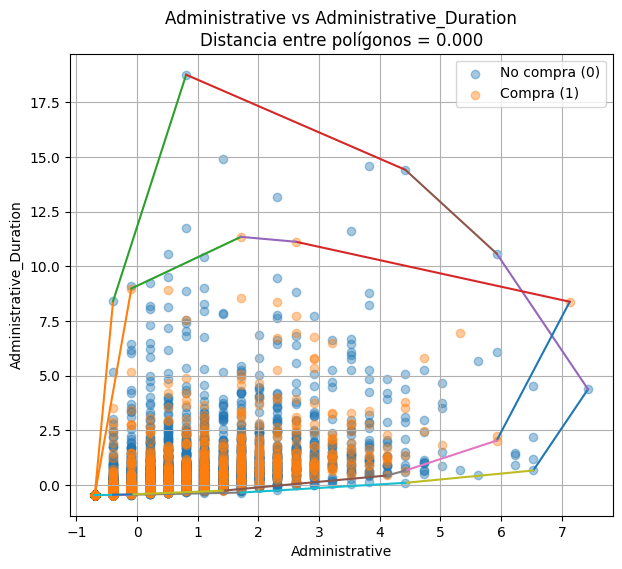

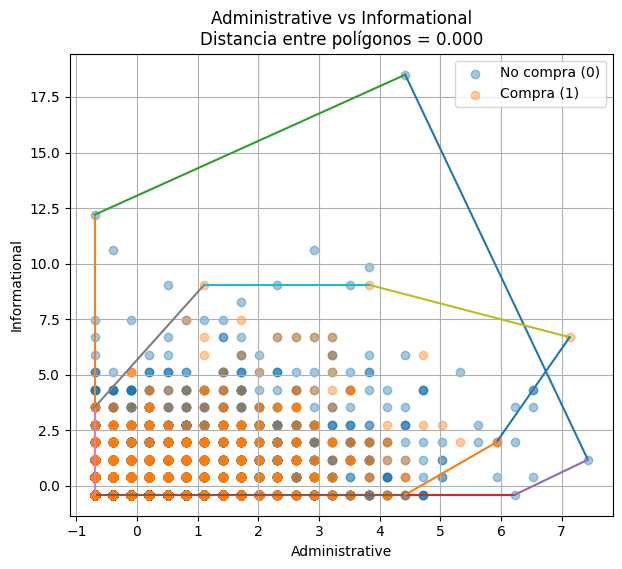

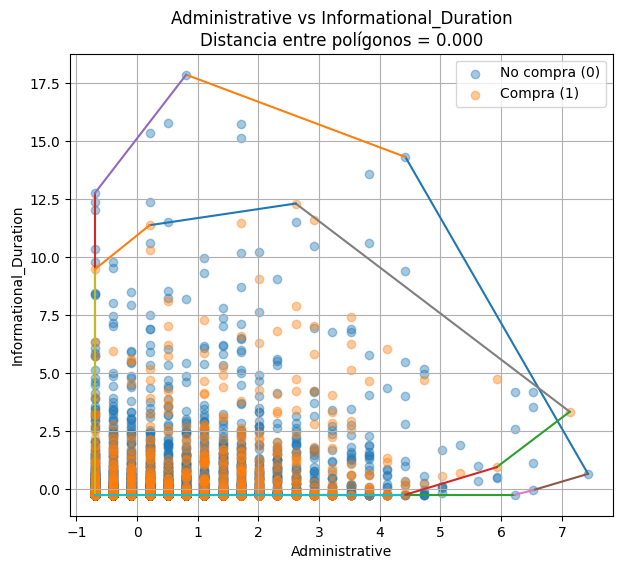

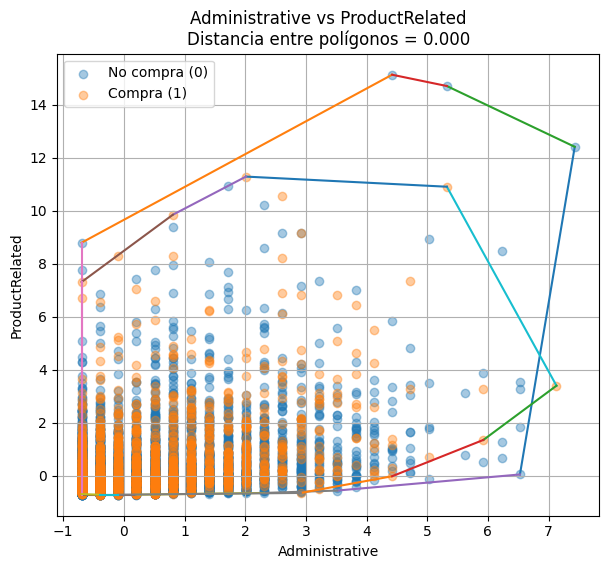

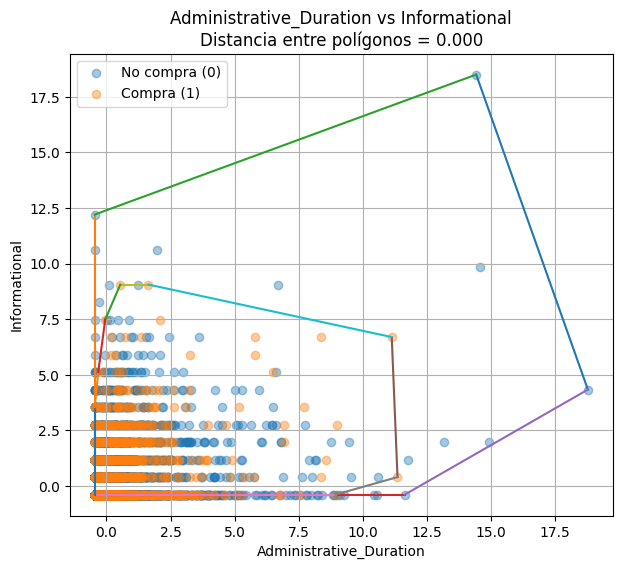

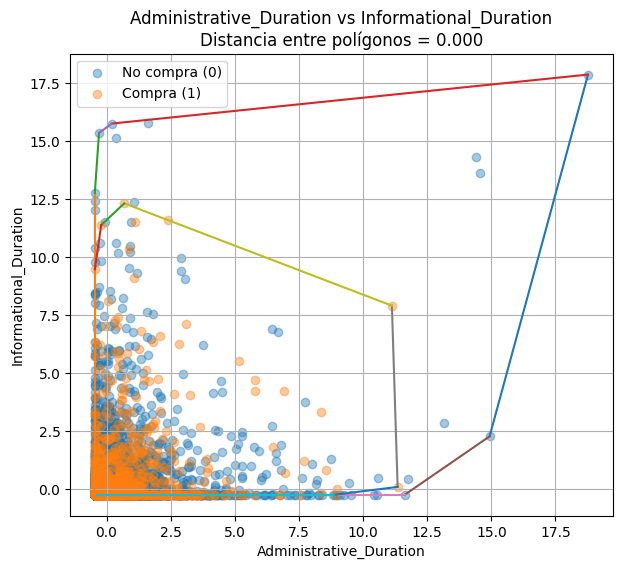

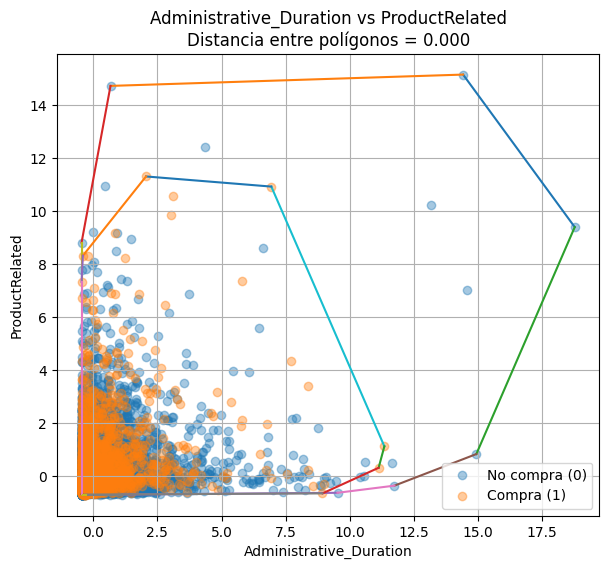

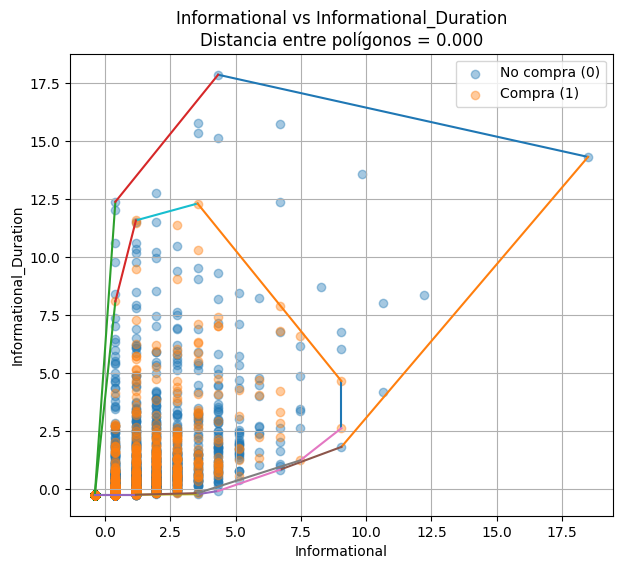

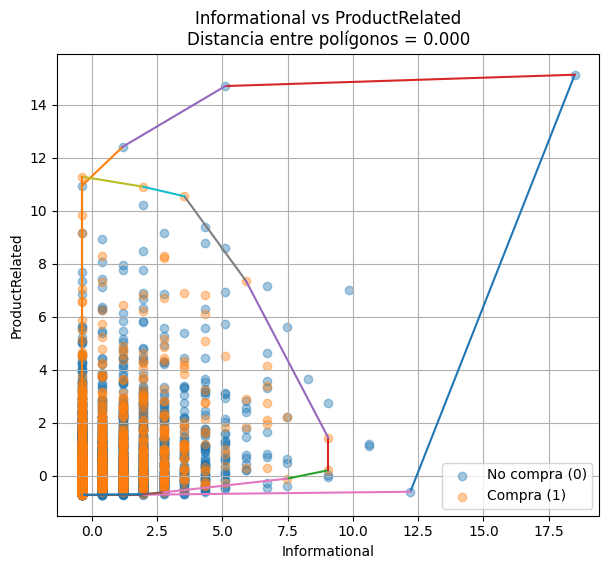

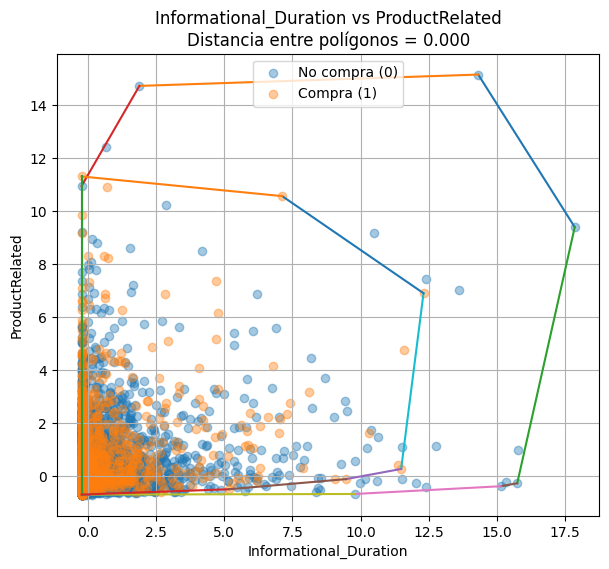

In [8]:
top_vars = importance_df["Variable"].head(5).tolist()

for f1, f2 in itertools.combinations(top_vars, 2):
    plot_hulls(X_scaled, y, f1, f2)


In [10]:
def plot_hulls_3d(df_scaled, y, f1, f2, f3):
    data = df_scaled[[f1, f2, f3]].values

    class_0 = data[y == 0]
    class_1 = data[y == 1]

    fig = plt.figure(figsize=(9, 7))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(class_0[:,0], class_0[:,1], class_0[:,2],
               alpha=0.25, label="Clase A (No compra)")
    ax.scatter(class_1[:,0], class_1[:,1], class_1[:,2],
               alpha=0.25, label="Clase B (Compra)")

    # Hull clase A
    if len(class_0) >= 4:
        hull0 = ConvexHull(class_0)
        for simplex in hull0.simplices:
            ax.plot(class_0[simplex,0],
                    class_0[simplex,1],
                    class_0[simplex,2])

    # Hull clase B
    if len(class_1) >= 4:
        hull1 = ConvexHull(class_1)
        for simplex in hull1.simplices:
            ax.plot(class_1[simplex,0],
                    class_1[simplex,1],
                    class_1[simplex,2])

    ax.set_xlabel(f1)
    ax.set_ylabel(f2)
    ax.set_zlabel(f3)
    ax.set_title(f"Espacio 3D: {f1}, {f2}, {f3}")
    ax.legend()
    plt.show()


In [11]:
def plot_hulls_3d(df_scaled, y, f1, f2, f3):
    data = df_scaled[[f1, f2, f3]].values

    class_0 = data[y == 0]
    class_1 = data[y == 1]

    fig = plt.figure(figsize=(9, 7))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(class_0[:,0], class_0[:,1], class_0[:,2],
               alpha=0.25, label="Clase A (No compra)")
    ax.scatter(class_1[:,0], class_1[:,1], class_1[:,2],
               alpha=0.25, label="Clase B (Compra)")

    # Hull clase A
    if len(class_0) >= 4:
        hull0 = ConvexHull(class_0)
        for simplex in hull0.simplices:
            ax.plot(class_0[simplex,0],
                    class_0[simplex,1],
                    class_0[simplex,2])

    # Hull clase B
    if len(class_1) >= 4:
        hull1 = ConvexHull(class_1)
        for simplex in hull1.simplices:
            ax.plot(class_1[simplex,0],
                    class_1[simplex,1],
                    class_1[simplex,2])

    ax.set_xlabel(f1)
    ax.set_ylabel(f2)
    ax.set_zlabel(f3)
    ax.set_title(f"Espacio 3D: {f1}, {f2}, {f3}")
    ax.legend()
    plt.show()


In [12]:
def voxel_matrices(df_scaled, y, features_3d, bins=10):
    data = df_scaled[features_3d].values

    grid = np.zeros((bins, bins, bins), dtype=int)

    mins = data.min(axis=0)
    maxs = data.max(axis=0)

    scaled = (data - mins) / (maxs - mins + 1e-9)
    indices = (scaled * (bins - 1)).astype(int)

    mat_A = np.zeros_like(grid)
    mat_B = np.zeros_like(grid)

    for idx, label in zip(indices, y):
        if label == 0:
            mat_A[tuple(idx)] += 1
        else:
            mat_B[tuple(idx)] += 1

    mat_overlap = np.logical_and(mat_A > 0, mat_B > 0).astype(int)

    return mat_A, mat_B, mat_overlap


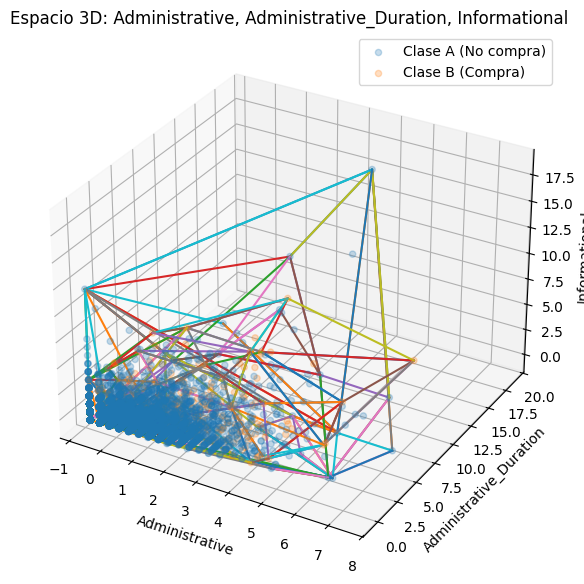

Matriz A (Clase 0):
 10422
Matriz B (Clase 1):
 1908
Voxels de sobreposición:
 63


In [13]:
f1, f2, f3 = top_vars[:3]

plot_hulls_3d(X_scaled, y, f1, f2, f3)

A, B, overlap = voxel_matrices(X_scaled, y, [f1, f2, f3], bins=12)

print("Matriz A (Clase 0):\n", A.sum())
print("Matriz B (Clase 1):\n", B.sum())
print("Voxels de sobreposición:\n", overlap.sum())


In [17]:
from mpl_toolkits.mplot3d import Axes3D

def plot_voxel_matrix(mat, title, color='blue'):
    xs, ys, zs = np.where(mat > 0)
    values = mat[xs, ys, zs]

    fig = plt.figure(figsize=(8, 7))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(xs, ys, zs,
               s=values * 10 + 5,
               alpha=0.6)

    ax.set_title(title)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.show()


### Aplicado en modelo Redes Neuronales

## Explicabilidad

 ### RF

 ### KNN

 Dado que KNN basa su predicción en distancias en el espacio de características, se propone usar esto a favor de la explicabilidadm trazando poligonos entre los puntos más separados dentro del conjunto de datos, en espacios bidimensionales, para poder calcular la distancia entre los poligonos, al ser considerar la distancia entre los poligonos como el eje principal dentro de knn, entre mayor sea su dsitancia es conveniente considerar que es lo que mejor define la predictibilidad de los datos, y por lo tanto la mayor importancia de las características dentro del conjunto predicho.

 Se puede apreciar en las gráficas que los poligonos tanto bidimensionales como tridimensionales se sobreponen entre si teniendo areas mayormente positivas de convergencia entre ambos datos, sin embargo, las areas de ambas clases se definen correctamente permitiendonos, saber que cuando mayor es el area de cierta clase, mayor probabilidad existe de que sea de ese grupo, por lo tanto las areas más grandes permiten conocer la importancia de la clase, además de permitirnos tambien, conocer la pureza o impureza (al igual que en arboles de desición) entre los poligonos de clases en el conjunto de datos

 ### Reder Neuronales

 

 ### Generales


 